In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
class_names = ['Bag','Bat','Bathtub','Binocular','Cactus','Calculator','Chopsticks','Computer Keyboard','Computer Monitor','Computer Mouse','Insect','Mug','Radio']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)


In [27]:
len(class_names)

13

In [4]:
def load_data():      
    datasets = ['Train', 'Test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

(x_train, y_train), (x_test, y_test) = load_data()

 13%|██████████▍                                                                     | 13/100 [00:00<00:00, 124.92it/s]

Loading Train


 39%|███████████████████████████████▊                                                 | 20/51 [00:00<00:00, 188.38it/s]

Loading Test


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 173.93it/s]


In [5]:
x_train = x_train/ 255.0 
x_test = x_test / 255.0

In [6]:
n_train = x_train.shape[0]
n_test = x_test.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 1028
Number of testing examples: 611
Each image is of size: (150, 150)


In [7]:
 def plot_sample(x,y,index):
    
    #plt.figure(figsize=(8,1))
    plt.imshow(x[index])
    plt.xlabel(class_names[y[index]])
     

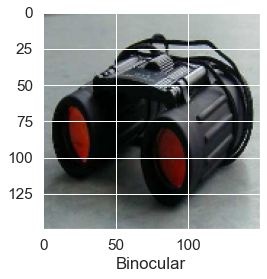

In [8]:
 plot_sample(x_train,y_train,361)

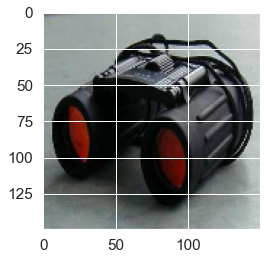

In [9]:
plt.imshow(x_train[361])

In [10]:
p=y_train[361]
class_names[p]

'Binocular'

In [11]:
x_train.shape

(1028, 150, 150, 3)

In [12]:
#y_train[-5:]
#y_train=y_train.reshape(-1,)
#y_test=y_test.reshape(-1,)
y_test[-5:]

array([12, 12, 12, 12, 12])

cnn

In [13]:
from tensorflow.keras import models,layers
cnn=models.Sequential([layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)),
                     layers.MaxPooling2D((2,2)),
                    layers.Conv2D(filters=68,kernel_size=(4,4),activation='relu',input_shape=(150,150,3)),
                     layers.MaxPooling2D((3,3)),
#dense 
layers.Flatten(),
layers.Dense(64,activation='relu'),
layers.Dense(13,activation='softmax')])

In [14]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
33/33 [==============================] - 37s 1s/step - loss: 2.5229 - accuracy: 0.1916
Epoch 2/5
33/33 [==============================] - 35s 1s/step - loss: 2.0910 - accuracy: 0.3405
Epoch 3/5
33/33 [==============================] - 35s 1s/step - loss: 1.5283 - accuracy: 0.5399
Epoch 4/5
33/33 [==============================] - 36s 1s/step - loss: 1.0668 - accuracy: 0.6634
Epoch 5/5
33/33 [==============================] - 36s 1s/step - loss: 0.6187 - accuracy: 0.8366


In [22]:
test_evaluate=cnn.evaluate(x_test,y_test)

20/20 [==============================] - 6s 290ms/step - loss: 2.4746 - accuracy: 0.4108


In [24]:
predictions = cnn.predict(x_test)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1)

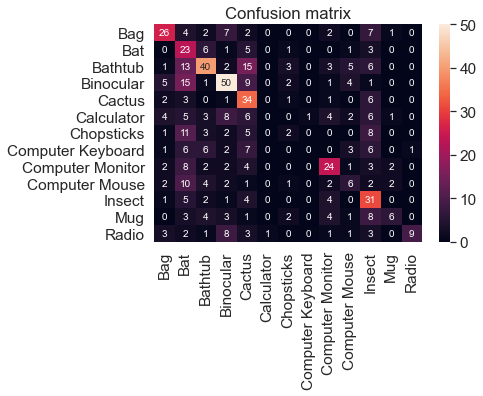

In [25]:
# Confusion matrix
CM = confusion_matrix(y_test, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()